In [1]:
# Feature Selection for Telecom Churn Data set and finalizing the model via Logisitic regression and PCA

# Importing relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress Warnings

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/telecom-churn-dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv
/kaggle/input/telecom-churn-data-sets/customer_data.csv
/kaggle/input/telecom-churn-data-sets/internet_data.csv
/kaggle/input/telecom-churn-data-sets/churn_data.csv
/kaggle/input/telecom-churn-data-sets/Telecom Churn Data Dictionary.csv


In [2]:
# Importing Telecom Churn DataSets
churn_data = pd.read_csv("/kaggle/input/telecom-churn-data-sets/churn_data.csv",sep = "," , engine = "python")

# Inspecting the various aspects of the churn_data dataframe
print(churn_data.shape,"\n")
print(churn_data.info(),"\n")
print(churn_data.head()) 

(7043, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB
None 

   customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               

In [3]:
# Importing Customer DataSets
customer_data = pd.read_csv("/kaggle/input/telecom-churn-data-sets/customer_data.csv", sep = "," , engine = "python")

# Inspecting the various aspects of the customer_data dataframe
print(customer_data.shape,"\n")
print(customer_data.info(),"\n")
print(customer_data.head()) 

(7043, 5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None 

   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No


In [4]:
# Importing Internet DataSets
internet_data = pd.read_csv("/kaggle/input/telecom-churn-data-sets/internet_data.csv" ,sep = "," , engine = "python")

# Inspecting the various aspects of the internet_data dataframe
print(internet_data.shape,"\n")
print(internet_data.info(),"\n")
print(internet_data.head()) 

(7043, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
customerID          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: object(9)
memory usage: 495.3+ KB
None 

   customerID     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  7590-VHVEG  No phone service             DSL             No          Yes   
1  5575-GNVDE                No             DSL            Yes           No   
2  3668-QPYBK                No             DSL            Yes          Yes   
3  7795-CFOCW  No phone service             DSL            Yes           No   
4  9237-HQITU                No     Fiber optic             No       

In [5]:
# Lets check if all the customer id is present in internet data and churn data. 
print("The number of customerID present in customer dataframe: ", len(customer_data.customerID))
print("The number of customerID present in Internet dataframe: ", len(internet_data.customerID))
print("The length of customerID present in churn dataframe: ", len(churn_data.customerID))
print("The number of Customer ID not present in internet data: ", len(customer_data[~customer_data.customerID.isin(internet_data.customerID)]))
print("The number of Customer ID not present in churn data: ", len(customer_data[~customer_data.customerID.isin(churn_data.customerID)]))

The number of customerID present in customer dataframe:  7043
The number of customerID present in Internet dataframe:  7043
The length of customerID present in churn dataframe:  7043
The number of Customer ID not present in internet data:  0
The number of Customer ID not present in churn data:  0


In [6]:
# Since the value is zero. it means that all customer id is present in both the data frame.
# Lets combine all three dataframes

# Merging on 'customerID'
telecom = pd.merge(churn_data, customer_data, how='inner', on='customerID')
telecom = pd.merge(telecom, internet_data, how='inner', on='customerID')

In [7]:
# lets check the combine data
print(telecom.shape,"\n")
print(telecom.info(),"\n")
print(telecom.head()) 

(7043, 21) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), 

In [8]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [9]:
# Lets convert some binary variable (Yes/No) to (0,1)

binarylist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[binarylist] = telecom[binarylist].apply(binary_map)

In [10]:
# Lets check the telecom data again to see binary mapping has been correctly applied or not

print(telecom.head())
print(telecom[binarylist].head())

   customerID  tenure  PhoneService        Contract  PaperlessBilling  \
0  7590-VHVEG       1             0  Month-to-month                 1   
1  5575-GNVDE      34             1        One year                 0   
2  3668-QPYBK       2             1  Month-to-month                 1   
3  7795-CFOCW      45             0        One year                 0   
4  9237-HQITU       2             1  Month-to-month                 1   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  gender  ...  \
0           Electronic check           29.85        29.85      0  Female  ...   
1               Mailed check           56.95       1889.5      0    Male  ...   
2               Mailed check           53.85       108.15      1    Male  ...   
3  Bank transfer (automatic)           42.30      1840.75      0    Male  ...   
4           Electronic check           70.70       151.65      1  Female  ...   

   Partner  Dependents     MultipleLines InternetService OnlineSecurity  \

In [11]:
# lets check the unique value in each column

for col in list(telecom):
    print(col)
    print(telecom[col].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
[0 1]
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
[1 0]
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn
[0 1]
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Ye

In [12]:
# From above , we can see that there are many categorical variables present with multiple levels, 
# So Let create dummy features

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy], axis=1)

In [13]:
# lets check the unique value in each column again

for col in list(telecom):
    print(col)
    print(telecom[col].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
[0 1]
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
[1 0]
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn
[0 1]
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Ye

In [14]:
# Creating dummy variables for the remaining categorical variables
# Dropping the level with No Phone Service and no Internet service since customer has not taken this service so it is better to drop this rather than first one

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [15]:
# Lets drop the variables for which we have created the dummy variables
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)


In [16]:
# lets check the unique value in each column again

for col in list(telecom):
    print(col)
    print(telecom[col].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
[0 1]
PaperlessBilling
[1 0]
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn
[0 1]
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
Contract_One year
[0 1]
Contract_Two year
[0 1]
PaymentMethod_Credit card (automatic)
[0 1]
PaymentMethod_Electronic check
[1 0]
PaymentMethod_Mailed check
[0 1]
gender_Male
[0 1]
InternetService_Fiber optic
[0 1]
InternetService_No
[0 1]
MultipleLines_No
[0 1]
MultipleLines_Yes
[0 1]
OnlineSecurity_No
[1 0]
OnlineSecurity_Yes
[0 1]
OnlineBackup_No
[0 1]
OnlineBackup_Yes
[1 0]
DeviceProtection_No
[1 0]
DeviceProtection_Yes
[0 1]
TechSup

In [17]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null object
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check         

In [18]:
# From above , we can see the data type of Total Charges is object. lets convert it to float.

# telecom['TotalCharges'] = telecom['TotalCharges'].convert_objects(convert_numeric=True)
telecom['TotalCharges'] = telecom['TotalCharges'].apply(pd.to_numeric,errors='coerce') 
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check        

In [19]:
# Now we can see from above that all variables is in numeric form

# Now lets check for the outliers in the continuous variable

num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

# Checking outliers at 25%, 50%, 75%, 85% , 90%, 95% , 97% and 99%

num_telecom.describe(percentiles=[0.25, 0.50, 0.75, 0.85, 0.90, 0.95, 0.97, 0.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
85%,65.000000,98.550000,1.000000,5200.150000
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000


In [20]:
# we can see that there are no outliers from above table

# Checking the missing values

telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [21]:
# Checking the percentage of missing values

round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [22]:
# Since only 11 rows(0.16%) are missing in TotalCharges, so removing it

telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [23]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [24]:
### Checking the Churn Rate

churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn


26.578498293515356

In [25]:
# We can see from above that 26.58% people has churned.



# Copying the telecom data for PCA model evaluation
telecom_pca = telecom.copy()

# Dropping Churn and customerID for X variable

X = telecom.drop(['Churn','customerID'], axis=1)
y = telecom['Churn']

# Now Splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [26]:
# Checking the shape of train and test data set
print(X_train.shape,"\n")
print(X_test.shape,"\n")
print(y_train.shape,"\n")
print(y_test.shape,"\n")

(4922, 30) 

(2110, 30) 

(4922,) 

(2110,) 



In [27]:
# Checking the customer churn in train and test data
print(y_train.mean())
print(y_test.mean())

0.26147907354733846
0.27582938388625594


In [28]:
# From above , we can see that train set has 26% churn ratio and test set has 28% Churn

# Now we have to do Feature scaling

# Normalising continuous features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()


,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


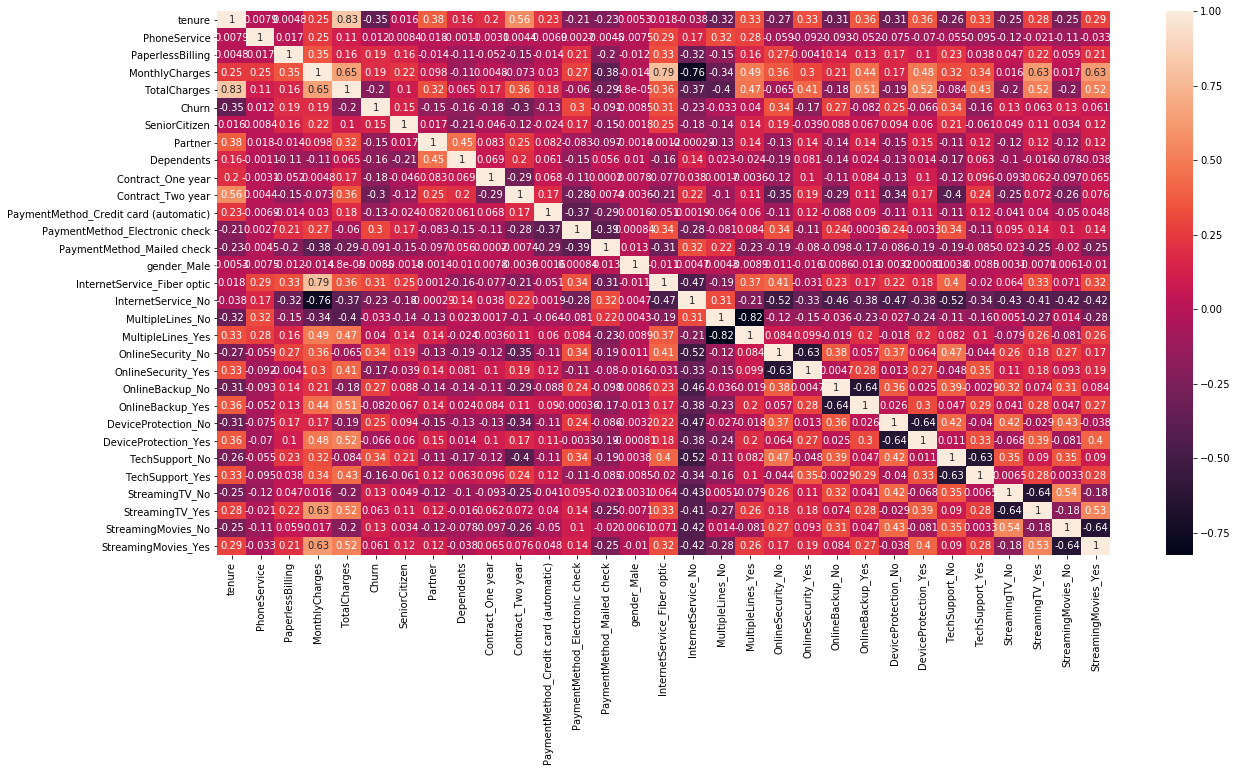

In [29]:
# Looking at Correlation

plt.figure(figsize = (20,10))  
sns.heatmap(telecom.corr(),annot = True)
plt.show()



In [30]:
# Model Building

import statsmodels.api as sm

# Logistic regression model
logmodel = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logmodel.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sat, 29 Feb 2020   Deviance:                       4009.4
Time:                        19:23:57   Pearson chi2:                 6.07e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2808      1.188     -2.763      0.006      -5.608      -0.953
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.8213      0.588      1.396      0.163      -0.332       1.974
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -3.4366      1.325     -2.594      0.009      -6.033      -0.840
MultipleLines_No                          0.1295      0.205      0.632      0.527      -0.272       0.531
MultipleLines_Yes                         0.6918      0.392      1.763      0.078      -0.077       1.461
OnlineSecurity_No                         0.0902      0.058      1.552      0.121      -0.024       0.204
OnlineSecurity_Yes                        0.0657      0.174      0.378      0.706      -0.275       0.406
OnlineBackup_No                          -0.0091      0.055     -0.167      0.868      -0.116       0.098
OnlineBackup_Yes                          0.1650      0.172      0.958      0.338      -0.172       0.502
DeviceProtection_No                      -0.0835      0.056     -1.492      0.136      -0.193       0.026
DeviceProtection_Yes                      0.2394      0.174      1.377      0.168      -0.101       0.580
TechSupport_No                            0.0932      0.058      1.598      0.110      -0.021       0.207
TechSuppo

Now lets come to the main part of this project.

Feature Selection: Why we need Feature selection ?

Feature selection is used to select the most useful features in a dataset. If we add irrelevant features in the model,
It will just make the model worst(Garbage IN , Garbage Out). It is also used to make model simple (Occam's Razor)

This section lists 6 feature selection alogrithm which i have used in various models and got good results. Earlier , i also
used to struggle how to do feature selection but one day i came across
<a href="https://mlwhiz.com/blog/2020/01/29/altr/?utm_campaign=handling-trees-in-data-science-algorithmic-interview&utm_medium=social_link&utm_source=missinglettr">this blog</a>.I find these methods very useful while doing feature selection



In [31]:
# In this i have implemented the python code. For theory , you can go to the above mentioned blog.

feature_name = list(X_train.columns)
# no of maximum features we need to select
num_features = 15

# 1.Pearson Correlation

We check the absolute value of the Pearson's correlation between the target and numerical features. We keep the top n features based on this criterion.



In [32]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
        
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


In [33]:
cor_support, cor_feature = cor_selector(X_train, y_train,num_features)
print(str(len(cor_feature)), 'selected features')
print(cor_feature)

15 selected features
['OnlineSecurity_Yes', 'SeniorCitizen', 'Contract_One year', 'PaperlessBilling', 'TotalCharges', 'MonthlyCharges', 'InternetService_No', 'DeviceProtection_No', 'OnlineBackup_No', 'Contract_Two year', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'TechSupport_No', 'OnlineSecurity_No', 'tenure']


#  2. Chi-Square Features
We calculate the chi-square metric between the target and the numerical variable and only select the variable with the maximum chi-squared values.

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=num_features)
chi_selector.fit(X_norm, y_train)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_feature)

15 selected features
['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Dependents', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'TechSupport_Yes']


# 3. Recursive Feature Elimination

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features, step=10, verbose=5)
rfe_selector.fit(X_train, y_train)

Fitting estimator with 30 features.
Fitting estimator with 20 features.


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=10, verbose=5)

In [36]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

15 selected features
['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check', 'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_No', 'OnlineSecurity_No', 'TechSupport_No', 'StreamingTV_Yes']


In [37]:
# 4. Lasso: SelectFromModel . Using L2 regularization as penalty.
    

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_features)
embeded_lr_selector.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=15, norm_order=1, prefit=False, threshold=None)

In [38]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

8 selected features
['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen', 'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic', 'TechSupport_No']


In [39]:
#5. Random Forest: SelectfromModel

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=23)
embeded_rf_selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [40]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

6 selected features
['tenure', 'MonthlyCharges', 'TotalCharges', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'OnlineSecurity_No']


In [41]:
#6. LightGBM : SelectFromModel

from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=23)
embeded_lgb_selector.fit(X_train, y_train)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt',
                                         class_weight=None,
                                         colsample_bytree=0.2,
                                         importance_type='split',
                                         learning_rate=0.05, max_depth=-1,
                                         min_child_samples=20,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         n_jobs=-1, num_leaves=32,
                                         objective=None, random_state=None,
                                         reg_alpha=3, reg_lambda=1, silent=True,
                                         subsample=1.0,
                                         subsample_for_bin=200000,
                                         subsample_freq=0),
                max_features=23, norm_order=1, prefit=False, 

In [42]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
print(embeded_lgb_feature)

3 selected features
['tenure', 'MonthlyCharges', 'TotalCharges']


In [43]:
pd.set_option('display.max_rows', None)

# put all selection together

feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})

# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)

# display the features
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_features)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,tenure,True,True,True,True,True,True,6
2,TotalCharges,True,False,True,True,True,True,5
3,InternetService_Fiber optic,True,True,True,True,True,False,5
4,TechSupport_No,True,True,True,True,False,False,4
5,SeniorCitizen,True,True,True,True,False,False,4
6,PaperlessBilling,True,True,True,True,False,False,4
7,OnlineSecurity_No,True,True,True,False,True,False,4
8,MonthlyCharges,True,False,True,False,True,True,4
9,Contract_Two year,True,True,True,True,False,False,4
10,Contract_One year,True,True,True,True,False,False,4


In [44]:
# So for this model , i will take top 12 features that is present in above tables and drop the rest

# Second Part : Using Logistic regression to predict 

col = ['tenure','TotalCharges','TechSupport_No','InternetService_Fiber optic','SeniorCitizen',
       'PaperlessBilling','OnlineSecurity_No','MonthlyCharges',
      'Contract_Two year','Contract_One year','PaymentMethod_Electronic check','InternetService_No']

In [45]:
# Accessing the model with Statsmodel

X_train_sm = sm.add_constant(X_train[col])
finalmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = finalmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2024.4
Date:                Sat, 29 Feb 2020   Deviance:                       4048.8
Time:                        19:23:59   Pearson chi2:                 6.00e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.3384      0.146    -15.985      0.000      -2.625      -2.052
tenure                            -1.4559      0.186     -7.831      0.000      -1.820      -1.092
TotalCharges                       0.7297      0.196      3.715      0.000       0.345       1.115
TechSupport_No                     0.4147      0.105      3.941      0.000       0.208       0.621
InternetService_Fiber optic        0.5603      0.172      3.263      0.001       0.224       0.897
SeniorCitizen                      0.4515      0.099      4.566      0.000       0.258       0.645
PaperlessBilling                   0.3562      0.089      3.990      0.000       0.181       0.531
OnlineSecurity_No                  0.4353      0.103      4.234      0.000       0.234       0.637
MonthlyCharges                     0.1005      0.136      0.736      0.461      -0.167       0.368
Contract_Two year                 -1.2443      0.211     -5.899      0.000      -1.658      -0.831
Contract_One year                 -0.6686      0.127     -5.252      0.000      -0.918      -0.419
PaymentMethod_Electronic check     0.3715      0.082      4.506      0.000       0.210       0.533
InternetService_No                -0.2256      0.243     -0.928      0.353      -0.702       0.251
==================================================================================================
"""

In [46]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
7,MonthlyCharges,12.94
1,TotalCharges,10.16
3,InternetService_Fiber optic,8.54
0,tenure,6.67
11,InternetService_No,6.15
2,TechSupport_No,3.26
6,OnlineSecurity_No,3.17
5,PaperlessBilling,2.55
8,Contract_Two year,2.29
10,PaymentMethod_Electronic check,1.88


In [47]:
# There are a few variables with high VIF and high P-value. 
# It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. 
# The variable 'MonthlyCharges' has the highest VIF. So let's start by dropping that

col = ['tenure','TotalCharges','InternetService_Fiber optic','TechSupport_Yes','SeniorCitizen',
       'PaymentMethod_Credit card (automatic)','PaperlessBilling','OnlineSecurity_Yes','InternetService_No',
      'Contract_Two year','Contract_One year']

In [48]:
# Accessing the model with Statsmodel

X_train_sm = sm.add_constant(X_train[col])
model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2031.1
Date:                Sat, 29 Feb 2020   Deviance:                       4062.2
Time:                        19:24:00   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3533      0.119    -11.329      0.000      -1.587      -1.119
tenure                                   -1.4880      0.176     -8.463      0.000      -1.833      -1.143
TotalCharges                              0.7842      0.174      4.495      0.000       0.442       1.126
InternetService_Fiber optic               0.7217      0.108      6.711      0.000       0.511       0.933
TechSupport_Yes                          -0.4161      0.101     -4.131      0.000      -0.613      -0.219
SeniorCitizen                             0.4809      0.098      4.889      0.000       0.288       0.674
PaymentMethod_Credit card (automatic)    -0.3042      0.110     -2.757      0.006      -0.520      -0.088
PaperlessBilling                          0.3887      0.089      4.380      0.000       0.215       0.563
OnlineSecurity_Yes                       -0.4431      0.101     -4.380      0.000      -0.641      -0.245
InternetService_No                       -1.2652      0.155     -8.188      0.000      -1.568      -0.962
Contract_Two year                        -1.2790      0.211     -6.076      0.000      -1.692      -0.866
Contract_One year                        -0.6809      0.127     -5.375      0.000      -0.929      -0.433
=========================================================================================================
"""

In [49]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
1,TotalCharges,6.71
0,tenure,6.29
9,Contract_Two year,2.97
2,InternetService_Fiber optic,2.57
6,PaperlessBilling,2.34
8,InternetService_No,2.23
3,TechSupport_Yes,1.93
7,OnlineSecurity_Yes,1.76
10,Contract_One year,1.75
5,PaymentMethod_Credit card (automatic),1.34


In [50]:
# Lets drop TotalCharges as it has very high VIF
col = ['tenure','InternetService_Fiber optic','TechSupport_Yes','SeniorCitizen',
       'PaymentMethod_Credit card (automatic)','PaperlessBilling','OnlineSecurity_Yes','InternetService_No',
      'Contract_Two year','Contract_One year']
col

['tenure',
 'InternetService_Fiber optic',
 'TechSupport_Yes',
 'SeniorCitizen',
 'PaymentMethod_Credit card (automatic)',
 'PaperlessBilling',
 'OnlineSecurity_Yes',
 'InternetService_No',
 'Contract_Two year',
 'Contract_One year']

In [51]:
# Let's re-run the model again 

X_train_sm = sm.add_constant(X_train[col])
finalmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = finalmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.9
Date:                Sat, 29 Feb 2020   Deviance:                       4083.8
Time:                        19:24:00   Pearson chi2:                 5.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3851      0.117    -11.803      0.000      -1.615      -1.155
tenure                                   -0.7637      0.060    -12.658      0.000      -0.882      -0.645
InternetService_Fiber optic               0.9742      0.092     10.607      0.000       0.794       1.154
TechSupport_Yes                          -0.3412      0.099     -3.432      0.001      -0.536      -0.146
SeniorCitizen                             0.4926      0.099      4.986      0.000       0.299       0.686
PaymentMethod_Credit card (automatic)    -0.3232      0.110     -2.934      0.003      -0.539      -0.107
PaperlessBilling                          0.3901      0.088      4.409      0.000       0.217       0.563
OnlineSecurity_Yes                       -0.4024      0.101     -3.991      0.000      -0.600      -0.205
InternetService_No                       -1.3130      0.153     -8.575      0.000      -1.613      -1.013
Contract_Two year                        -1.2197      0.207     -5.883      0.000      -1.626      -0.813
Contract_One year                        -0.6581      0.125     -5.247      0.000      -0.904      -0.412
=========================================================================================================
"""

In [52]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
8,Contract_Two year,2.92
5,PaperlessBilling,2.31
1,InternetService_Fiber optic,2.01
2,TechSupport_Yes,1.88
7,InternetService_No,1.82
0,tenure,1.76
9,Contract_One year,1.75
6,OnlineSecurity_Yes,1.74
4,PaymentMethod_Credit card (automatic),1.34
3,SeniorCitizen,1.29


In [53]:
# We can see that P value is now less and there are no variables which has high VIF

y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [54]:
y_train_pred[:10]

array([0.26697392, 0.22649264, 0.72344409, 0.48437641, 0.62876172,
       0.4348864 , 0.30209033, 0.81063799, 0.16717696, 0.52709198])

In [55]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.266974,879
1,0,0.226493,5790
2,1,0.723444,6498
3,1,0.484376,880
4,1,0.628762,2784


In [56]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.266974,879,0
1,0,0.226493,5790,0
2,1,0.723444,6498,1
3,1,0.484376,880,0
4,1,0.628762,2784,1


In [57]:
# Let's check the overall accuracy.
from sklearn import metrics

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7978464039008533


In [58]:
# Metrics beyond Accuracy

# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: {:2.2f}%".format((TP / float(TP+FN))*100))

# Let us calculate specificity
print("Specifity: {:2.2f}%".format((TN / float(TN+FP))*100))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate: {:2.2f}%".format((FP/ float(TN+FP))*100))

# positive predictive value 
print ("Positive Predicitve Value: {:2.2f}%".format((TP / float(TP+FP))*100))

# Negative predictive value
print("Negative Predictive Value: {:2.2f}%".format((TN / float(TN+ FN))*100))

Sensitivity: 50.04%
Specifity: 90.32%
False Postive Rate: 9.68%
Positive Predicitve Value: 64.66%
Negative Predictive Value: 83.62%


# Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between True Positive Rate(Sensitivity) and False Positive Rate(Specifity)
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [59]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [60]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

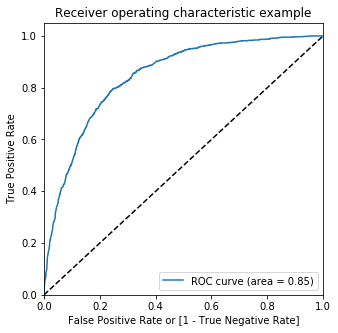

In [61]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [62]:
# Now we have to choose the optimal cutpoint. Earlier, we are choosing 0.5 as optimal cut point which is not right.
# lets find the prob where we get balanced sensitivity and specificity and choose this point as optimal cut off.

# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.266974,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.226493,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.723444,6498,1,1,1,1,1,1,1,1,1,0,0
3,1,0.484376,880,0,1,1,1,1,1,0,0,0,0,0
4,1,0.628762,2784,1,1,1,1,1,1,1,1,0,0,0


In [63]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.612759  0.945610  0.494911
0.2   0.2  0.721048  0.859363  0.672077
0.3   0.3  0.768793  0.783217  0.763686
0.4   0.4  0.797237  0.668221  0.842916
0.5   0.5  0.797846  0.500389  0.903164
0.6   0.6  0.798456  0.386169  0.944429
0.7   0.7  0.775701  0.197358  0.980468
0.8   0.8  0.749898  0.048951  0.998074
0.9   0.9  0.738521  0.000000  1.000000


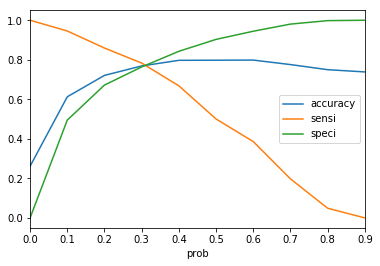

In [64]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.


In [65]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.266974,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.226493,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.723444,6498,1,1,1,1,1,1,1,1,1,0,0,1
3,1,0.484376,880,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.628762,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [66]:
# Lets look at final Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy Score: {:2.2f}%".format((metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted))*100))

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: {:2.2f}%".format((TP / float(TP+FN))*100))

# Let us calculate specificity
print("Specifity: {:2.2f}%".format((TN / float(TN+FP))*100))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate: {:2.2f}%".format((FP/ float(TN+FP))*100))

# positive predictive value 
print ("Positive Predicitve Value: {:2.2f}%".format((TP / float(TP+FP))*100))

# Negative predictive value
print("Negative Predictive Value: {:2.2f}%".format((TN / float(TN+ FN))*100))

Accuracy Score: 76.88%
Sensitivity: 78.32%
Specifity: 76.37%
False Postive Rate: 23.63%
Positive Predicitve Value: 53.99%
Negative Predictive Value: 90.87%


In [67]:
# Making prediction on Test Data Sets

X_test = X_test[col]
X_test.head()



,tenure,InternetService_Fiber optic,TechSupport_Yes,SeniorCitizen,PaymentMethod_Credit card (automatic),PaperlessBilling,OnlineSecurity_Yes,InternetService_No,Contract_Two year,Contract_One year
942,-0.347623,1,0,0,1,1,0,0,0,0
3730,0.999203,1,0,0,1,1,0,0,0,0
1761,1.040015,0,0,0,1,1,0,1,1,0
2283,-1.286319,1,0,0,0,1,0,0,0,0
1872,0.346196,0,0,0,0,0,0,1,1,0


In [68]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = res.predict(X_test_sm)

y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

,Churn,Churn_Prob,CustID
942,0,0.480373,942
3730,1,0.248399,3730
1761,0,0.009515,1761
2283,1,0.723444,2283
1872,0,0.015035,1872


In [69]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [70]:
# Lets look at final Confusion Matrix

confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.final_predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy Score: {:2.2f}%".format((metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted))*100))

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: {:2.2f}%".format((TP / float(TP+FN))*100))

# Let us calculate specificity
print("Specifity: {:2.2f}%".format((TN / float(TN+FP))*100))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate: {:2.2f}%".format((FP/ float(TN+FP))*100))

# positive predictive value 
print ("Positive Predicitve Value: {:2.2f}%".format((TP / float(TP+FP))*100))

# Negative predictive value
print("Negative Predictive Value: {:2.2f}%".format((TN / float(TN+ FN))*100))

# Overall AUC Score
print("Overall AUC Score: {:2.2f}%".format((metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.Churn_Prob))*100))

Accuracy Score: 73.65%
Sensitivity: 72.34%
Specifity: 74.15%
False Postive Rate: 25.85%
Positive Predicitve Value: 51.59%
Negative Predictive Value: 87.56%
Overall AUC Score: 82.68%


# We are getting Overall AUC score as 83% , Accuracy score as 74% and Specifity is around 74% for test data.

# Now We will look at PCA and we will see how PCA can reduce our effort ?



In [71]:
# Feature Standardisation for PCA

df = telecom_pca[['tenure','MonthlyCharges','TotalCharges']]

normalized_df=(df-df.mean())/df.std()
telecom_pca = telecom_pca.drop(['tenure','MonthlyCharges','TotalCharges'], 1)
telecom_pca = pd.concat([telecom_pca,normalized_df],axis=1)
telecom_pca.head()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391


In [72]:
# Splitting the data into Training set and Test set

# Putting feature variable to X
X = telecom_pca.drop(['Churn','customerID'],axis=1)

# Putting response variable to y
y = telecom_pca['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Checking the shape of train and test data set
print(X_train.shape,"\n")
print(X_test.shape,"\n")
print(y_train.shape,"\n")
print(y_test.shape,"\n")

(4922, 30) 

(2110, 30) 

(4922,) 

(2110,) 



In [73]:
#Importing the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

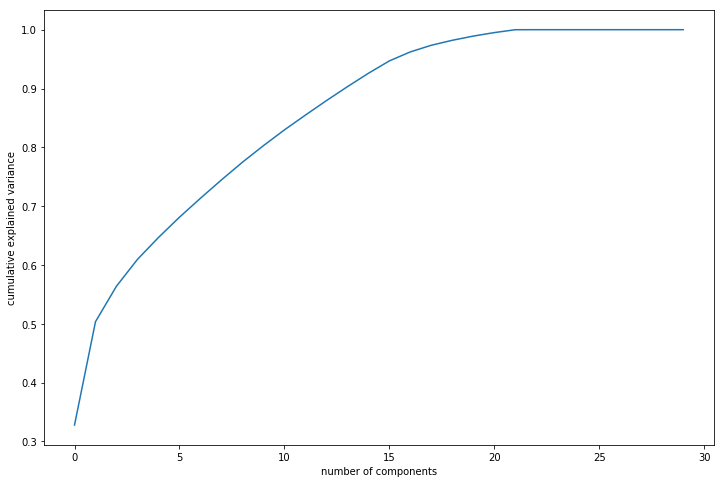

In [74]:
# Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [75]:
#### Looks like 16 components are enough to describe 95% of the variance in the dataset

#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=16)

In [76]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(4922, 16)

In [77]:
#Applying selected components to the test data - 16 components

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2110, 16)

In [78]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [79]:
#Making prediction on the test data

pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]

# ROC AUC Score
print("ROC AUC Score: {:2.2f}%".format((metrics.roc_auc_score(y_test, pred_probs_test)*100)))



ROC AUC Score: 82.69%


# AUC Score comes around 83% which is same as predicted by logistic regression model. So it is the same result, without the hard work on Feature Selection 